In [188]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
#import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers 
import keras
from keras.models import Sequential
#from keras.layers.core import Dense,Activation,Dropout
from keras.layers import Dense, Activation,Dropout
from keras.datasets import mnist
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

#from keras.wrappers.scikit_learn import KerasClassifier

## Library and its version

In [45]:
#!pip install --upgrade --force-reinstall tensorflow

In [46]:
#!pip install keras==2.7.0
#!pip uninstall seaborn

In [47]:
#!pip install tensorflow ==2.8.0
#!pip install pydot

In [48]:
#conda install python=3.7.6

In [49]:
#orig=mnist

In [50]:
#pip install pydot

In [189]:
#Digit MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
data = (x_train, y_train), (x_test, y_test)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

r = pd.DataFrame(data)
r

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, ..."


In [190]:
x_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [191]:
x_test,y_test

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

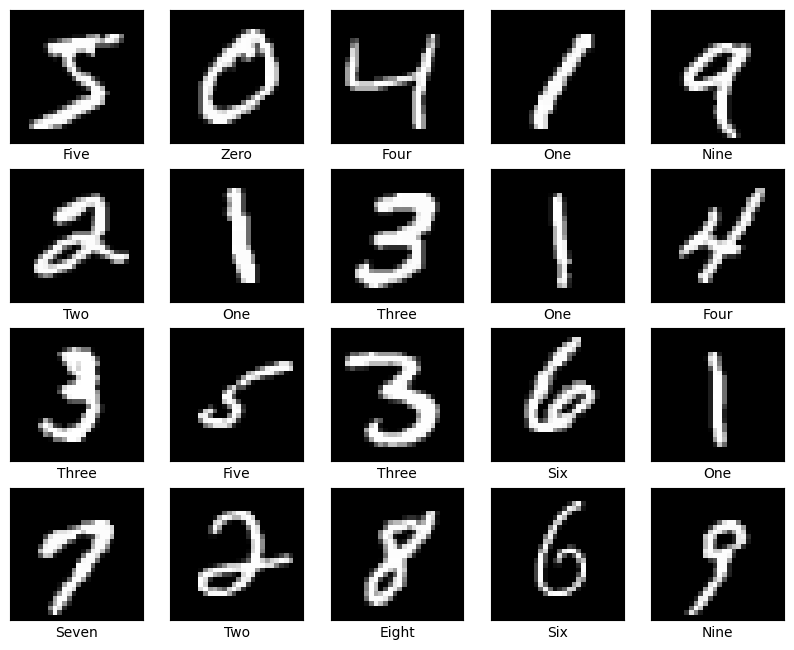

In [192]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='grey')
    plt.xlabel(col_names[y_train[i]])
  
plt.show()

### Since ANN accepts only 2 D input hence before preprocessing knowing the shape of input variables

In [193]:
x_train.shape

(60000, 28, 28)

In [194]:
x_test.shape

(10000, 28, 28)

# Preprocessing the input-Converting 3d to 2d

In [195]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [196]:
x_train.shape

(60000, 784)

In [197]:
x_test.shape

(10000, 784)

### ANN output should be used from one hot ending 

In [198]:
y_train.shape

(60000,)

In [199]:
y_test.shape

(10000,)

In [200]:
#Encoding Digit MNIST Labels
y_train = to_categorical(y_train, num_classes=10, dtype='int32')

y_test = to_categorical(y_test, num_classes=10, dtype='int32')

In [201]:
y_train.shape

(60000, 10)

In [202]:
y_train #.shape

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [65]:
#pip install scikit-learn==0.24.2

In [203]:
#Creating base neural network
model = keras.Sequential([ 
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

In [204]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 222218 (868.04 KB)
Trainable params: 222218 (868.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
#https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

In [205]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [206]:
history=model.fit(x_train, y_train, batch_size=100, epochs=15,validation_data=(x_test, y_test))

Epoch 1/15
600/600 [==============================] - 7s 11ms/step - loss: 1.3224 - accuracy: 0.8360 - val_loss: 0.3570 - val_accuracy: 0.9120
Epoch 2/15
600/600 [==============================] - 6s 11ms/step - loss: 0.2742 - accuracy: 0.9275 - val_loss: 0.2450 - val_accuracy: 0.9342
Epoch 3/15
600/600 [==============================] - 6s 11ms/step - loss: 0.1958 - accuracy: 0.9474 - val_loss: 0.2298 - val_accuracy: 0.9452
Epoch 4/15
600/600 [==============================] - 7s 12ms/step - loss: 0.1632 - accuracy: 0.9549 - val_loss: 0.1987 - val_accuracy: 0.9478
Epoch 5/15
600/600 [==============================] - 7s 11ms/step - loss: 0.1337 - accuracy: 0.9622 - val_loss: 0.1957 - val_accuracy: 0.9537
Epoch 6/15
600/600 [==============================] - 7s 12ms/step - loss: 0.1162 - accuracy: 0.9674 - val_loss: 0.1992 - val_accuracy: 0.9533
Epoch 7/15
600/600 [==============================] - 8s 13ms/step - loss: 0.1082 - accuracy: 0.9702 - val_loss: 0.1707 - val_accuracy: 0.9583

In [230]:
test_loss_digit,test_acc_digit = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1474 - accuracy: 0.9679


In [231]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,2))

Digit MNIST Test accuracy: 0.97


In [232]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)
y_predict[0]

313/313 [==============================] - 1s 3ms/step


array([2.9307463e-11, 5.6765130e-06, 2.3988113e-07, 5.7777424e-07,
       3.4902530e-07, 1.4153118e-11, 3.7775916e-08, 9.9999297e-01,
       4.7698265e-11, 1.5447928e-07], dtype=float32)

In [234]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [235]:
y_test_eval=np.argmax(y_test, axis=1)

In [236]:
y_test_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [237]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

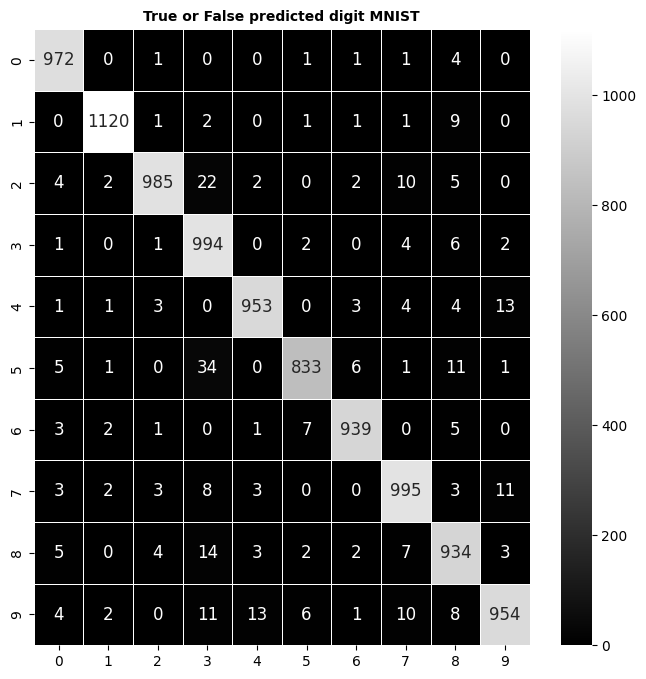

In [213]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_eval,y_predicts)
#plt.style.use('seaborn-deep')
plt.figure(figsize=(8,8))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 12},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST',fontweight='bold',fontsize=10)
plt.show()

In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.92      0.98      0.95      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.93      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.94      0.96      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [215]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


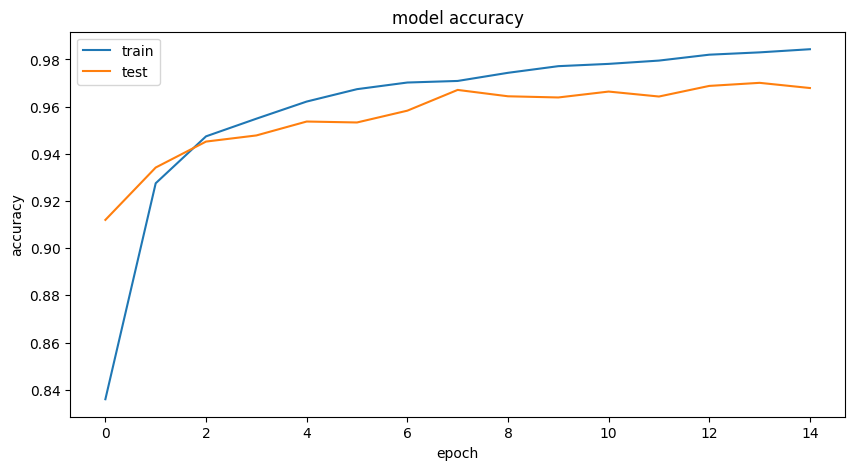

In [226]:
# summarize history for accuracy
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

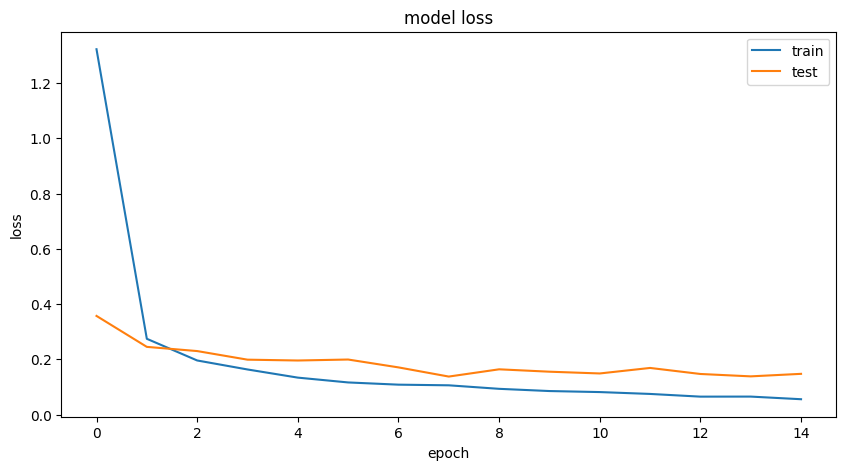

In [229]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [238]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test)
y_predict_single[0]

313/313 [==============================] - 1s 4ms/step


array([2.9307463e-11, 5.6765130e-06, 2.3988113e-07, 5.7777424e-07,
       3.4902530e-07, 1.4153118e-11, 3.7775916e-08, 9.9999297e-01,
       4.7698265e-11, 1.5447928e-07], dtype=float32)

In [239]:
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_predicts_single

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [240]:
y_test_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

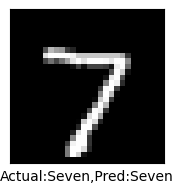

In [185]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(3,2))
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
#plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test[0])],col_names[y_predicts_single[0]]))
plt.xlabel("Actual:{},Pred:{}".format(col_names[y_test_eval[0]],col_names[y_predicts_single[0]]))
plt.xticks([])
plt.yticks([])
plt.show()

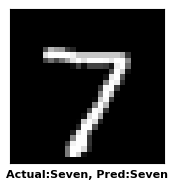

In [241]:

col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Assuming x_test, y_test_eval, and y_predicts_single are defined

plt.figure(figsize=(3, 2))
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.xlabel("Actual:{}, Pred:{}".format(col_names[y_test_eval[0]], col_names[y_predicts_single[0]]), fontweight='bold', fontsize=8)
plt.xticks([])
plt.yticks([])
plt.show()

In [170]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [171]:
y_test_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)